In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, metrics
import m2cgen as m2c
import numpy as np

# Set display options
pd.set_option('display.max_rows', None)

In [20]:
# Read CSV file
df = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)
df = df.drop([122, 123, 165], axis=0)
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [21]:
# Replace empty values in 'Region'
df.loc[:121, 'Region'] = 'Bejaia'
df.loc[122:244, 'Region'] = 'Sidi-Bel'
# Drop unnecessary columns
df = df.drop(['day', 'month', 'year'], axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_23456\334675726.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Bejaia' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:121, 'Region'] = 'Bejaia'


In [22]:
# Strip leading/trailing whitespaces in column names and 'Classes'
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].str.strip()

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1   RH           243 non-null    object
 2   Ws           243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      242 non-null    object
 11  Region       243 non-null    object
dtypes: object(12)
memory usage: 22.9+ KB


In [23]:
# Convert specified columns to numeric
Column_list = ["Temperature", 'RH', 'Ws', 'Rain', "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
for i in Column_list:
    df[i] = pd.to_numeric(df[i], errors='coerce')  # Coerce invalid values to NaN

# Drop rows with NaN values
df = df.dropna()

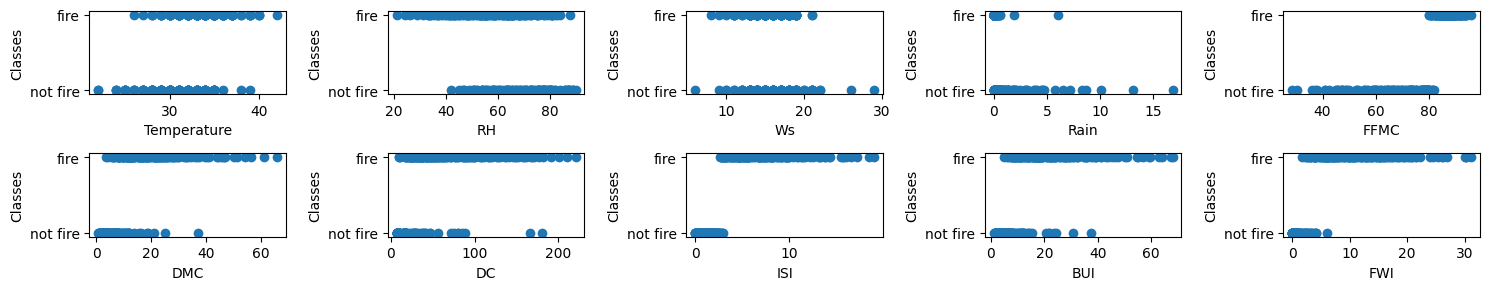

In [24]:
# Extract numeric and categorical columns
Numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = set(df.columns).difference(set(Numeric_columns))

# Visualization of the DataFrame
fig, ax = plt.subplots(2, 5, figsize=(15, 3))
for i in range(2):
    for j in range(5):
        c = (i * 5) + j
        column = df.columns[c]
        ax[i, j].scatter(df[column], df['Classes'])
        ax[i, j].set_xlabel(column)
        ax[i, j].set_ylabel('Classes')
plt.tight_layout()
plt.show()

In [25]:
 #Create dataset from DataFrame
X = df.loc[:, 'Temperature':'FWI']
y = df['Classes']

# Split the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1234)

Accuracy: 0.9795918367346939
F1 Score: 0.9795918367346939


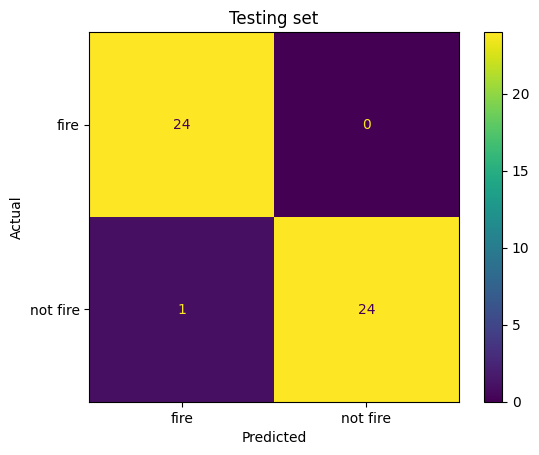

In [26]:
# Decision tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Model evaluation
y_test_hat = model.predict(X_test)
class_labels = ['fire', 'not fire']
print('Accuracy:', metrics.accuracy_score(y_test, y_test_hat))
print('F1 Score:', metrics.f1_score(y_test, y_test_hat, pos_label='fire'))

# Visualization of confusion matrix with specified labels
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, labels=class_labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Testing set')
plt.show()

In [27]:
# Export the trained model to JavaScript
print("* JavaScript code:", m2c.export_to_javascript(model))

* JavaScript code: function score(input) {
    var var0;
    if (input[7] <= 2.549999952316284) {
        var0 = [0.0, 1.0];
    } else {
        if (input[4] <= 80.14999771118164) {
            var0 = [0.0, 1.0];
        } else {
            if (input[9] <= 3.5) {
                if (input[6] <= 34.40000057220459) {
                    var0 = [1.0, 0.0];
                } else {
                    var0 = [0.0, 1.0];
                }
            } else {
                var0 = [1.0, 0.0];
            }
        }
    }
    return var0;
}

